In [1]:
library(dplyr)
dat <- read.csv('mice_pheno.csv')

controlPop <- filter(dat, Sex=='F' & Diet=='chow') %>% select(Bodyweight) %>% unlist

hfPop <- filter(dat, Sex=='F' & Diet=='hf') %>% select(Bodyweight) %>% unlist

mu_hf <- mean(hfPop)
mu_control <- mean(controlPop)
mu_hf - mu_control


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 2.375517

In [3]:
((mu_hf-mu_control)/mu_control) * 100

[1] 9.942157

In [4]:
#the mean of the high fat diet female mice is almost 10% higher than
#the mean of the control diet mice population

In [5]:
#check statistical significance with t-test
set.seed(1)
N <- 5
hf <- sample(hfPop, N)
control <- sample(controlPop, N)
t.test(hf,control)$p.value

[1] 0.1410204

In [6]:
#while we are rejecting null, the issue here is Power
N <- 12
alpha <- 0.05
B <- 2000
reject <- function(N, alpha=0.05){
    hf <- sample(hfPop,N)
    control <- sample(controlPop, N)
    pval <- t.test(hf,control)$p.value
    pval < alpha
}

In [7]:
reject(12)

[1] FALSE

In [9]:
rejections <-replicate(B,reject(N))

In [10]:
mean(rejections)

[1] 0.2145

In [11]:
#with a sample size of just 12 mice, our power is ~23%

In [12]:
Ns <- seq(5,50,5)

In [14]:
power <- sapply(Ns,function(N) {
    rejections <- replicate(B, reject(N))
    mean(rejections)
})

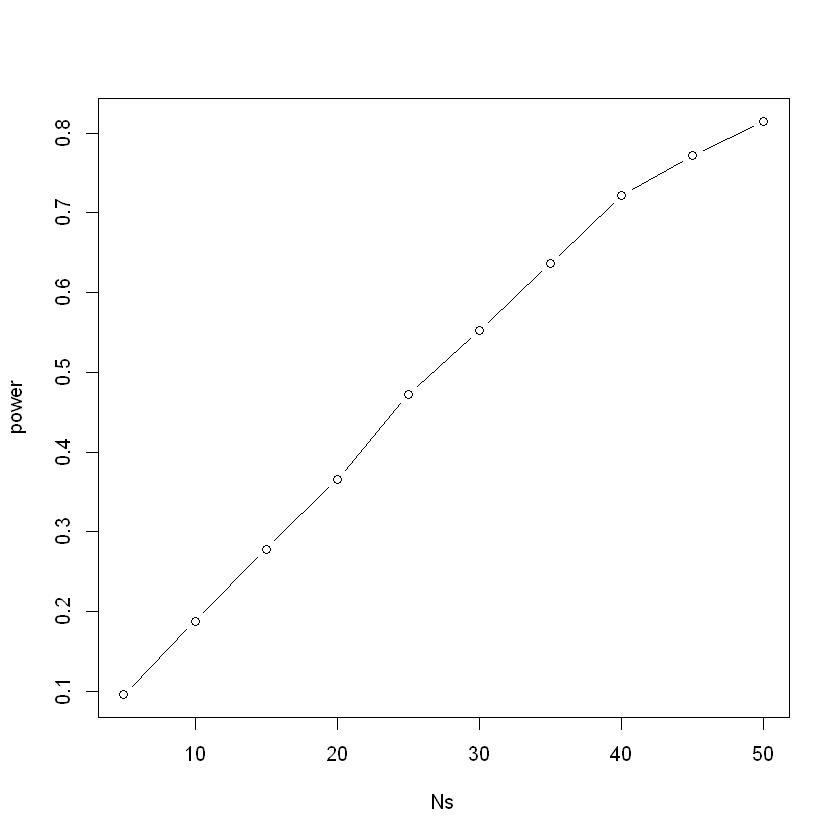

In [15]:
plot(Ns,power,type='b')

In [16]:
#As you can see, Power increases with a larger N value, 
#alpha values (rejection thresholds) alter power as well

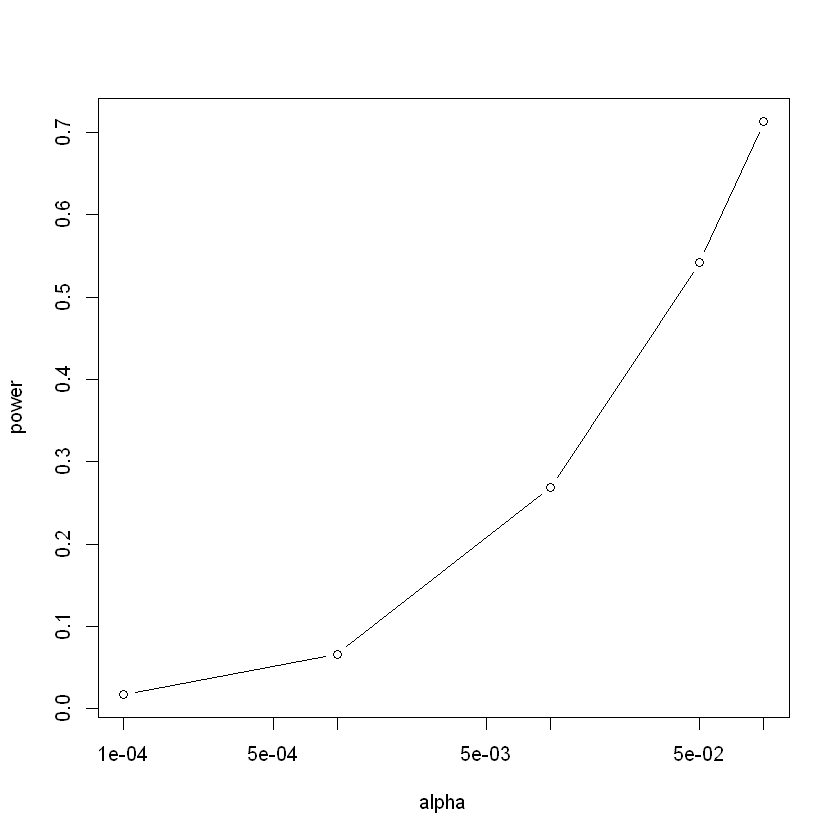

In [18]:
N <- 30
alphas <- c(0.1,0.05,0.01,0.001,0.0001)
power <- sapply(alphas, function(alpha){
    rejections <- replicate(B,reject(N,alpha=alpha))
    mean(rejections)
})

plot(alphas,power,xlab='alpha', type='b',log='x')